<a href="https://colab.research.google.com/github/gabrielluizone/FirstCode/blob/main/OC_Prova02_CD5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Tarefa 1.3**

$$
\begin{array}{cc}
\hline
\textbf{Data} & \textbf{Valor Abertura} \\ \hline
02/10/23 & \$132.15 \\
03/10/23 & \$134.93 \\
04/10/23 & \$133.66 \\
05/10/23 & \$136.13 \\
06/10/23 & \$134.94 \\ \hline
\end{array}
$$

a) Plotar os dados apresentados na tabela acima. Usar o eixo $x$ para as datas e o eixo $y$ para os valores. Alem disso, o eixo $x$ deve variar entre $0$ e $6$, e o eixo $y$ deve variar
entre $130$ e $140$.

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import Markdown as md
import numpy as np
plt.style.use('bmh')

x = ['02/10/23', '03/10/23', '04/10/23', '05/10/23', '06/10/23']
x_idx = [1,2,3,4,5]
y = [132.15, 134.93, 133.66, 136.13, 134.94]

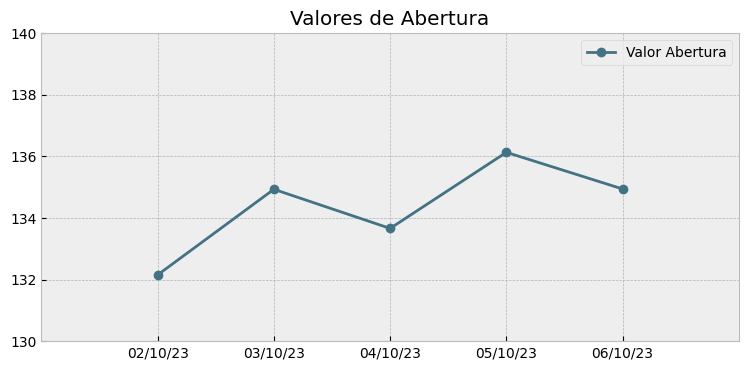

In [ ]:
fig = plt.figure(figsize=(9, 4), dpi=100)
plt.plot(x_idx, y, marker='o', color='#447285', label='Valor Abertura')

# Configuração dos eixos
plt.xlim(0, 6)
plt.ylim(130, 140)
plt.xticks(ticks=x_idx, labels=x)

# Adicionar título e rótulos
plt.title('Valores de Abertura')
plt.legend()
fig.show()

Mostrar que $\alpha = 132.328$ e $\beta = 0.678$. Para isso, assuma que ti = i.

In [ ]:
x = np.array([132.15, 134.93, 133.66, 136.13, 134.94])
t = np.array([1, 2, 3, 4, 5])
n = len(x)

t_bar = sum(t)/n
x_bar = sum(x)/n

var1 = np.sum( t * x - t_bar*x_bar )
var2 = np.sum( t**2 - t_bar**2 )

beta = var1 / var2
alpha = x_bar - beta * t_bar

display(md(f'### `Alpha`: ${alpha:.3f}$ \| `Beta`: ${beta:.3f}$'))

### `Alpha`: $132.328$ \| `Beta`: $0.678$

In [ ]:
y_pred = [ (ti*beta + alpha) for ti in x_idx]
print(y_pred)

[133.006, 133.684, 134.362, 135.04, 135.718]


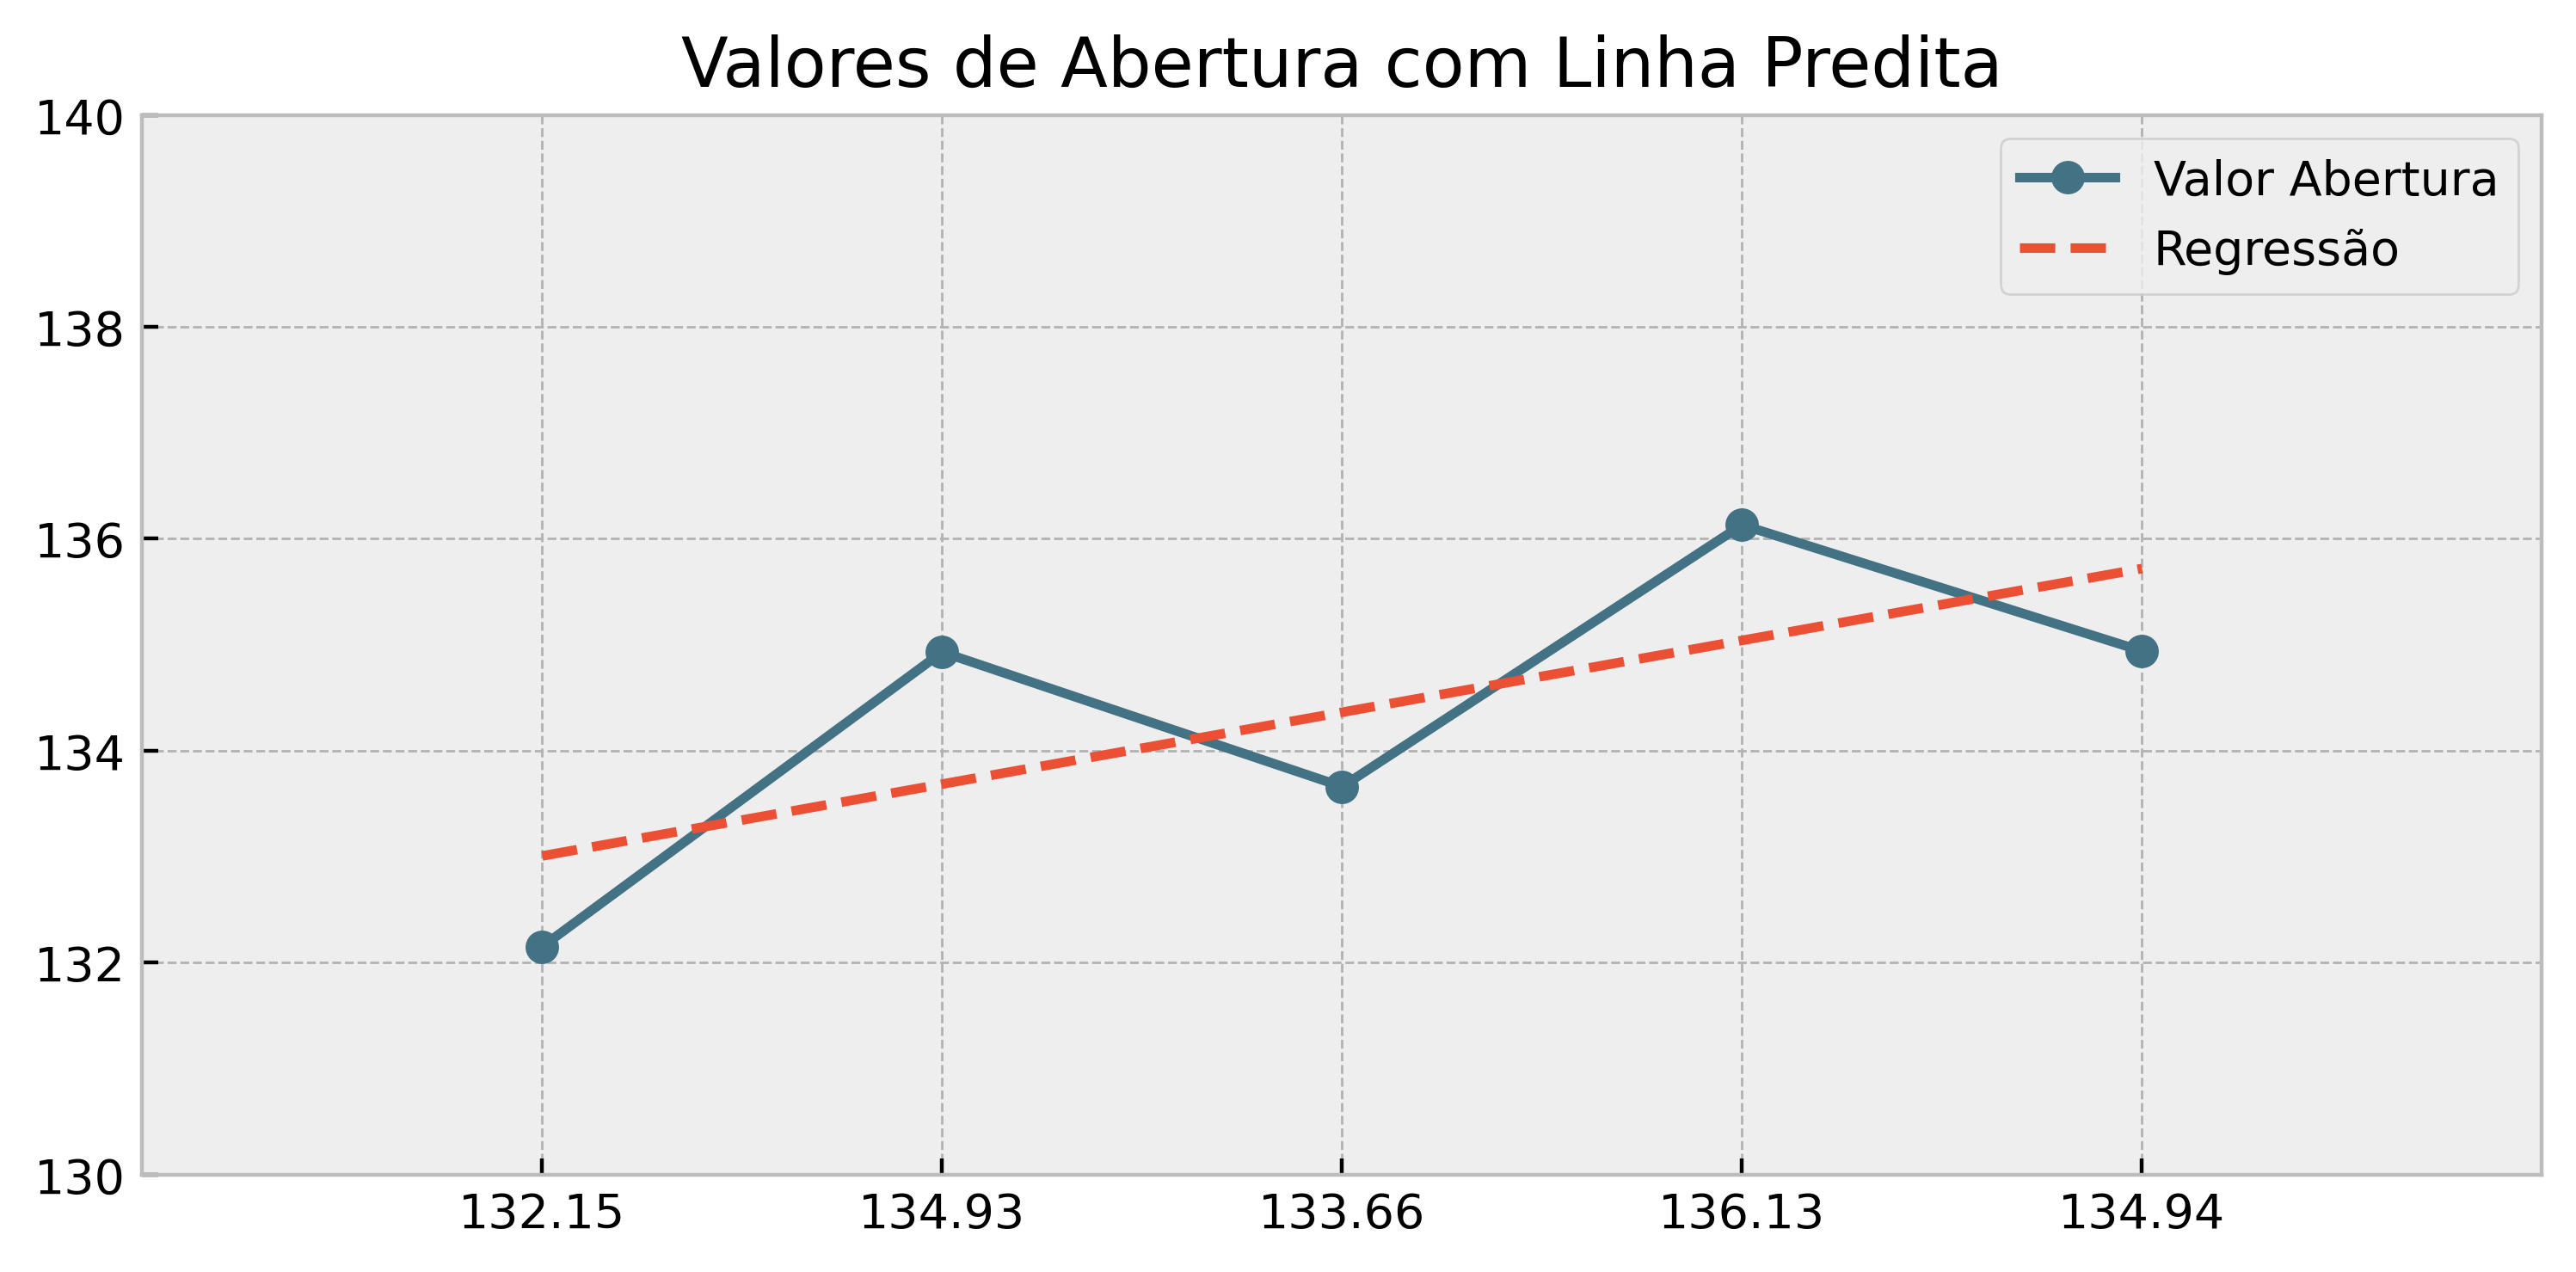

In [ ]:
plt.figure(figsize=(9, 4), dpi=400)
plt.plot(x_idx, y, marker='o', color='#447285', label='Valor Abertura')
plt.plot(x_idx, y_pred, linestyle='--', color='#eb4f34', label='Regressão')

# As limitações
plt.xlim(0, 6)
plt.ylim(130, 140)
plt.xticks(ticks=x_idx, labels=x)

plt.title('Valores de Abertura com Linha Predita')
plt.legend()
plt.show()


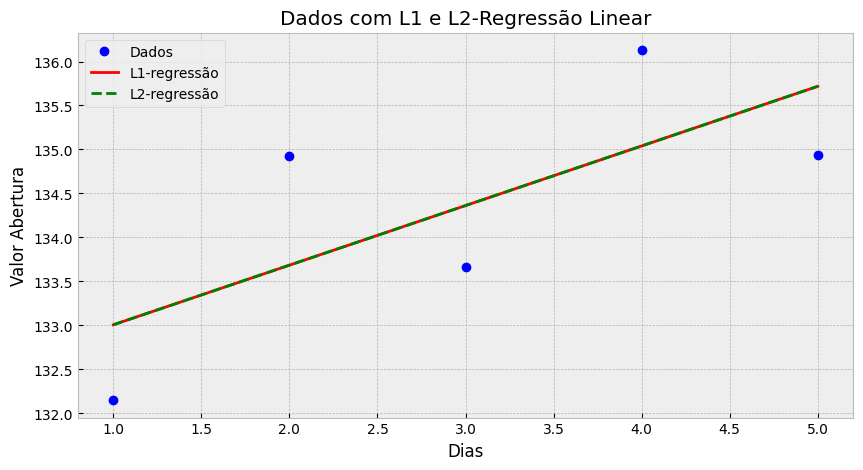

In [ ]:
# L2-regressão
alpha_l2 = 132.328
beta_l2 = 0.678
l2_reg = [alpha_l2 + beta_l2 * tt for tt in t]

# Plotar dados e ambas as regressões
plt.figure(figsize=(10, 5))
plt.plot(t, x, 'bo', label='Dados')
plt.plot(t, y_pred, 'r-', label='L1-regressão')
plt.plot(t, l2_reg, 'g--', label='L2-regressão')
plt.xlabel('Dias')
plt.ylabel('Valor Abertura')
plt.title('Dados com L1 e L2-Regressão Linear')
plt.legend()
plt.show()


## **LINDO Problema 3 em PYTHON**

In [3]:
!pip install pulp --quiet
import pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 45.6 MB/s eta 0:00:00


In [7]:
# Meu LINDO modelo em PYTHON
model = pulp.LpProblem("Maximize_Profit", pulp.LpMaximize)
x1 = pulp.LpVariable('x1', lowBound=0, cat='Integer')  # Fechaduras Tipo 1
x2 = pulp.LpVariable('x2', lowBound=0, cat='Integer')  # Fechaduras Tipo 2

# Função objetivo
model += 20 * x1 + 15 * x2, "Lucro"

# Restrições
model += x1 <= 100, "MateriaPrima_Tipo1"
model += x2 <= 100, "MateriaPrima_Tipo2"
model += 10000 + 20 * x1 + 15 * x2 >= 4000, "Restricao_Caixa"
model += (15000 + 100 * x1 + 90 * x2)/(9000) >= 2, "Restricao_Razao"

# Resolver o problema
model.solve()
print("Status:", pulp.LpStatus[model.status])

# Valores das variáveis de decisão
print("Quantidade Tipo 1:", pulp.value(x1))
print("Quantidade Tipo 2:", pulp.value(x2))

# Valor da função objetivo
print("Lucro máximo:", pulp.value(model.objective))


Status: Optimal
Quantidade Tipo 1: 100.0
Quantidade Tipo 2: 100.0
Lucro máximo: 3500.0


## **Problema 4.2**

In [25]:
# Definir o problema de minimização
prob = pulp.LpProblem("Fluxo_de_Custo_Minimo", pulp.LpMinimize)

# Variáveis de decisão (fluxo em cada aresta)
x12 = pulp.LpVariable('x12', lowBound=0, upBound=15, cat='Integer')
x13 = pulp.LpVariable('x13', lowBound=0, upBound=8, cat='Integer')
x23 = pulp.LpVariable('x23', lowBound=0, upBound=20, cat='Integer')
x24 = pulp.LpVariable('x24', lowBound=0, upBound=4, cat='Integer')
x25 = pulp.LpVariable('x25', lowBound=0, upBound=10, cat='Integer')
x34 = pulp.LpVariable('x34', lowBound=0, upBound=15, cat='Integer')
x35 = pulp.LpVariable('x35', lowBound=0, upBound=4, cat='Integer')
x45 = pulp.LpVariable('x45', lowBound=0, upBound=20, cat='Integer')
x53 = pulp.LpVariable('x53', lowBound=0, upBound=5, cat='Integer')

# Função objetivo: Minimizar o custo total do fluxo
prob += (4 * x12 + 4 * x13 + 2 * x23 + 2 * x24 + 2 * x25 +
         x34 + 3 * x35 + 2 * x45 + 3 * x53), "Custo Total"

# Restrições de conservação de fluxo
prob += x12 + x13 == 20, "Fluxo no Nó 1"
prob += x24 + x23 + x25 - x12 == 0, "Fluxo no Nó 2"
prob += x34 + x35 - x53 - x23 - x13 == 0, "Fluxo no Nó 3"
prob += x45 - x24 - x34 == -5, "Fluxo no Nó 4"
prob += x53 - x53 - x45 - x25 == -15, "Fluxo no Nó 5"

# Resolver o problema
prob.solve()
print("Status:", pulp.LpStatus[prob.status])

# Mostrar os valores ótimos das variáveis de decisão
for variable in prob.variables():
    print(f"{variable.name} = {variable.varValue}")

print("Custo Total:", pulp.value(prob.objective))


Status: Optimal
x12 = 12.0
x13 = 8.0
x23 = 0.0
x24 = 2.0
x25 = 10.0
x34 = 8.0
x35 = 0.0
x45 = 5.0
x53 = 0.0
Custo Total: 122.0


In [26]:
prob

Fluxo_de_Custo_Minimo:
MINIMIZE
4*x12 + 4*x13 + 2*x23 + 2*x24 + 2*x25 + 1*x34 + 3*x35 + 2*x45 + 3*x53 + 0
SUBJECT TO
Fluxo_no_Nó_1: x12 + x13 = 20

Fluxo_no_Nó_2: - x12 + x23 + x24 + x25 = 0

Fluxo_no_Nó_3: - x13 - x23 + x34 + x35 - x53 = 0

Fluxo_no_Nó_4: - x24 - x34 + x45 = -5

Fluxo_no_Nó_5: - x25 - x45 + 0 x53 = -15

VARIABLES
0 <= x12 <= 15 Integer
0 <= x13 <= 8 Integer
0 <= x23 <= 20 Integer
0 <= x24 <= 4 Integer
0 <= x25 <= 10 Integer
0 <= x34 <= 15 Integer
0 <= x35 <= 4 Integer
0 <= x45 <= 20 Integer
0 <= x53 <= 5 Integer